In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ctrace
from ctrace.simulation import *

In [3]:
with open("../output/run[1-15]/results.csv", "r") as csv:
    df = pd.read_csv(csv)
df

,G,SIR_file,budget,iterations,method,p,trial_id,num_infected,peak,iterations.1
0,montgomery,Q4data.json,1300,2,degree,0.01,0,877,106,2
1,montgomery,Q4data.json,1300,3,random,0.01,0,884,103,3
2,montgomery,Q4data.json,1300,3,degree,0.02,0,1075,219,3
3,montgomery,Q4data.json,1300,4,random,0.02,0,1125,226,4
4,montgomery,Q4data.json,1300,4,degree,0.03,0,1240,292,4
...,...,...,...,...,...,...,...,...,...,...
415,montgomery,Q4data.json,1300,13,dependent,0.11,9,39173,7029,13
416,montgomery,Q4data.json,1300,12,dependent,0.12,9,42201,8045,12
417,montgomery,Q4data.json,1300,15,dependent,0.09,9,31477,4246,15
418,montgomery,Q4data.json,1300,14,dependent,0.10,9,35849,5575,14


In [30]:
table = pd.pivot_table(df, values=['infected', 'peak'], index=['p'], columns=['method'], aggfunc=np.average)

In [34]:
infected = table['infected']
infected

method,degree,dependent,random
p,,,
0.01,881.0,870.2,885.7
0.02,1036.3,1018.6,1039.3
0.03,1246.7,1190.2,1292.4
0.04,1516.1,1451.9,1809.4


In [32]:
peak = table["peak"]

<AxesSubplot:xlabel='p'>

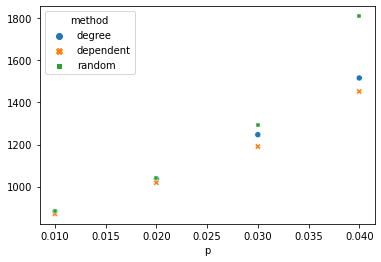

In [35]:
sns.scatterplot(data=infected)

<AxesSubplot:xlabel='p', ylabel='num_infected'>

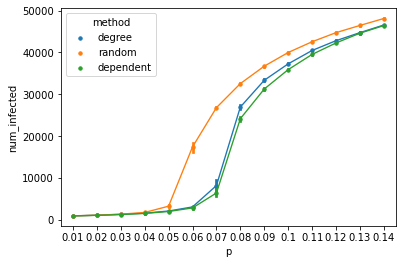

In [18]:
sns.pointplot(data=df, x="p", y='num_infected', hue='method', size=0.1, ci=95,
              scale=0.5)